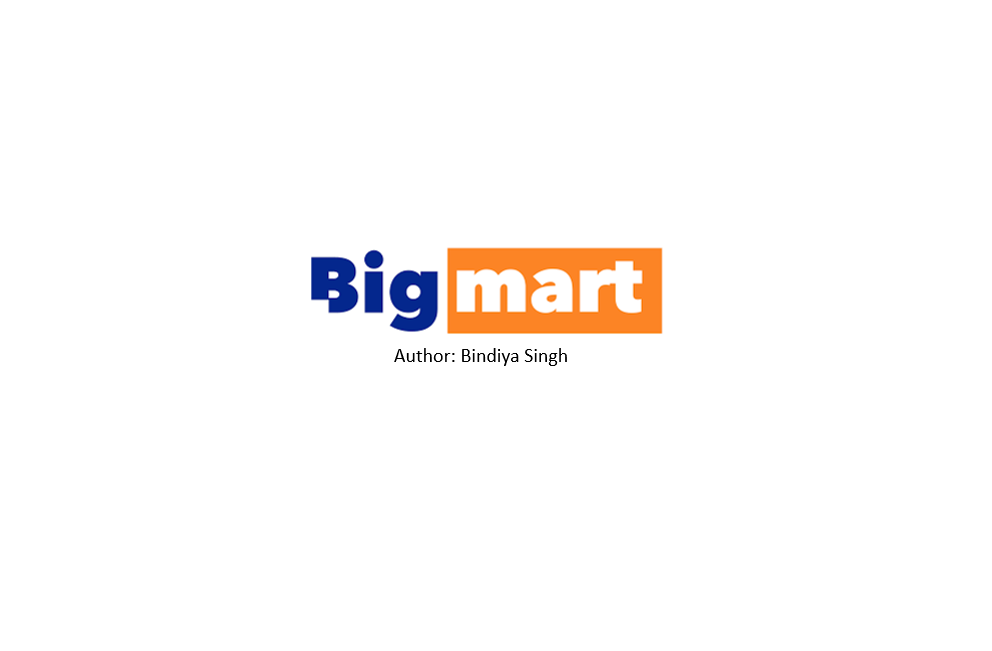

# <h1><span style="color:BLACK"><center>BIGMART PRODUCT SALES FACTORS, ANALYSIS AND PREDICTION</center></span></h1>


## Table of Contents

About Dataset<br>
Business Goal<br>
Description of Dataset<br>
Preprocessing and Data Analysis<br>
Univariate Analysis<br>
Bivariate Analysis<br>
Multivariate Analysis<br>
Encoding<br>
Scaling Data<br>
Model Building<br>
Model Evaluation<br>
Prediction<br>
Conclusion<br>

## About Dataset

The BigMart Dataset consist of 2013 sales data with 14204 observations and 12 variables.

The dataset includes information about various stores, product id, item weight, item fat content, item visibility, item type, item MRP, outlet identifier, outlet establishment year and sales. However, the dataset is uncleaned, it contains missing values, inconsistent formatting, and other errors that need to be addressed before the data can be used for analysis or modelling.

## Business Goal

The aim is to build a predictive model and predict the sales value. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

## Description of the Dataset 

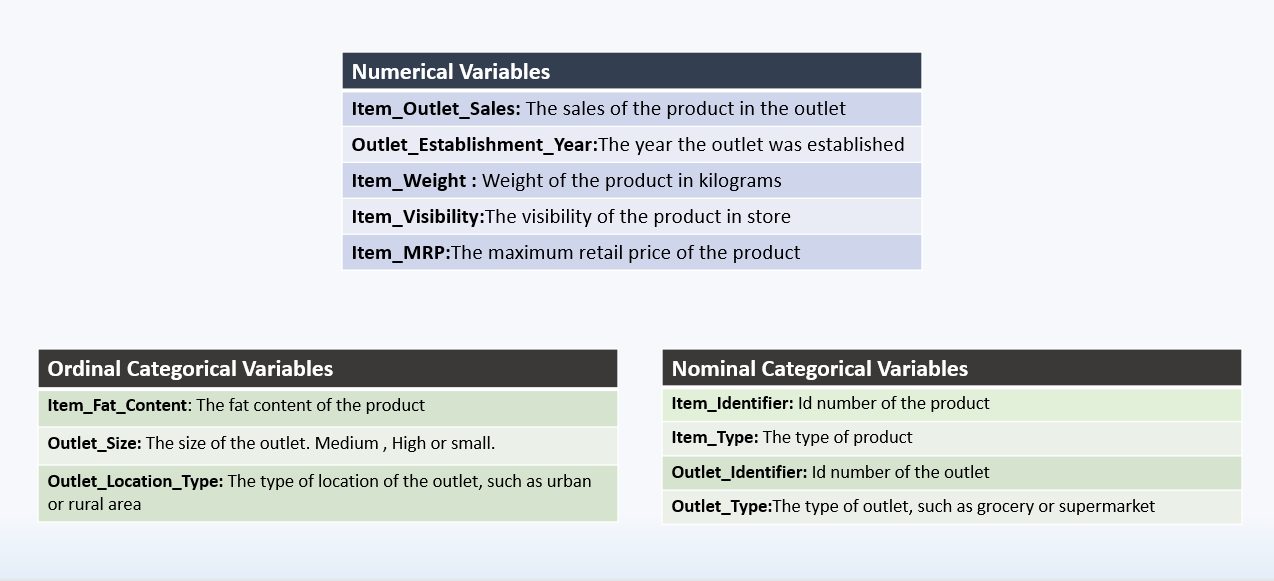


#### File Path:
https://www.kaggle.com/datasets/thedevastator/bigmart-product-sales-factors/data

## Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from statsmodels.formula.api import ols

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import math
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

from sklearn.neighbors import LocalOutlierFactor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

pd.options.display.float_format = "{:.2f}".format

## Preprocessing and Data Analysis

In [ ]:
# Reading CSV Dataset 
df=pd.read_csv('Sales Dataset.csv')
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
df_Original=df[:]

## 2) Handling Duplicate Values

In [ ]:
df.duplicated().sum()

## 3) Handling Missing Values 

In [ ]:
df.isna().sum()

In [ ]:
df['Item_Weight'].value_counts(normalize=True)*100

In [15]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)

In [16]:
df['Outlet_Size'].value_counts(normalize=True)*100

Outlet_Size
Medium   45.69
Small    39.07
High     15.24
Name: proportion, dtype: float64

In [17]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [18]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [19]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    8671
Small     3980
High      1553
Name: count, dtype: int64

In [20]:
df[['Outlet_Size','Item_Weight'].isna().sum()

SyntaxError: incomplete input (2214368267.py, line 1)

## 4) EDA

## UNIVARIATE ANALYSIS
### A) Categorical Variables 

In [21]:
# check for categorical attributes
categorical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_columns.append(i)
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [22]:
# check for categorical attributes value counts
value_counts = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        a=df[i].value_counts()
        value_counts.append(a)
        print(a)
        print('*'*50)
print(value_counts)   

Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: count, Length: 1559, dtype: int64
**************************************************
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64
**************************************************
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64
**************************************************
Outlet_Identifier
OU

### Item Fat Content

#### Streamlining Column 'Item_Fat_Content'

In [23]:
df['Item_Fat_Content'].value_counts(normalize=True)*100

Item_Fat_Content
Low Fat   59.74
Regular   33.96
LF         3.68
reg        1.37
low fat    1.25
Name: proportion, dtype: float64

In [24]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [25]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [26]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: New_Item_Type, Length: 14204, dtype: object

In [27]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts()

New_Item_Type
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

In [28]:
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts(normalize=True)*100

Item_Fat_Content
Low Fat      45.75
Regular      35.34
Non-Edible   18.91
Name: proportion, dtype: float64

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

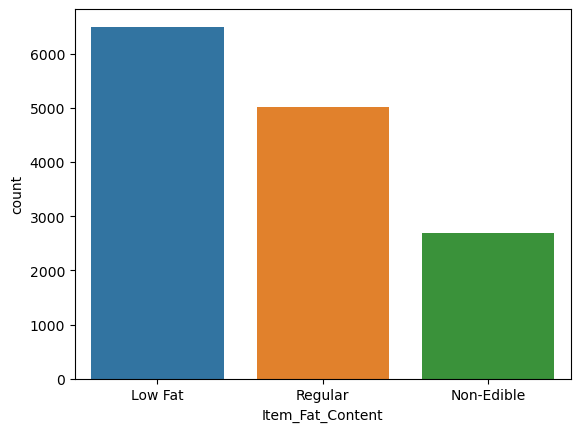

In [29]:
import seaborn as sns
plt.figure(figsize=(4,3))
sns.countplot(x='Item_Fat_Content', data = df)

### Outlet Size

In [30]:
df['Outlet_Size'].value_counts(normalize=True)*100

Outlet_Size
Medium   61.05
Small    28.02
High     10.93
Name: proportion, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
sns.countplot(x='Outlet_Size',data=df)

### Item Type

In [32]:
df['Item_Type'].value_counts(normalize=True)*100

Item_Type
Fruits and Vegetables   14.17
Snack Foods             14.00
Household               10.90
Frozen Foods            10.04
Dairy                    8.00
Baking Goods             7.65
Canned                   7.63
Health and Hygiene       6.04
Meat                     5.18
Soft Drinks              5.11
Breads                   2.93
Hard Drinks              2.55
Others                   1.97
Starchy Foods            1.89
Breakfast                1.31
Seafood                  0.63
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='Item_Type'>

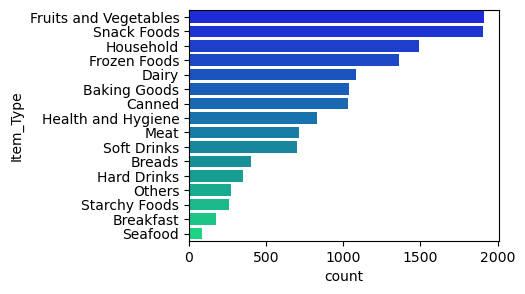

In [102]:
plt.figure(figsize=(4,3))
order = df['Item_Type'].value_counts().index[::1]
sns.countplot(y='Item_Type',data = df, order=order, palette='winter')

### Outlet Identifier

In [34]:
df['Outlet_Identifier'].value_counts(normalize=True)*100

Outlet_Identifier
OUT027   10.98
OUT013   10.93
OUT049   10.91
OUT046   10.91
OUT035   10.91
OUT045   10.90
OUT018   10.88
OUT017   10.86
OUT010    6.51
OUT019    6.20
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='Outlet_Identifier'>

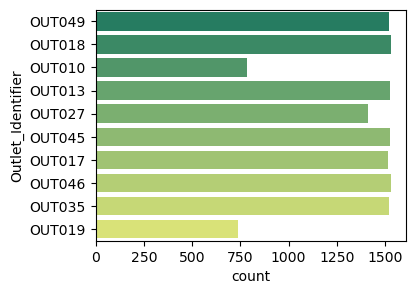

In [101]:
plt.figure(figsize=(4,3))
sns.countplot(y='Outlet_Identifier',data=df, palette ='summer')

### Outlet_Location_Type

In [36]:
df['Outlet_Location_Type'].value_counts(normalize=True)*100

Outlet_Location_Type
Tier 3   39.31
Tier 2   32.67
Tier 1   28.02
Name: proportion, dtype: float64

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

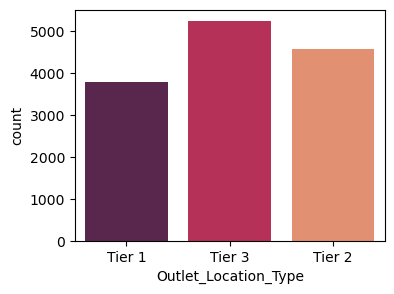

In [94]:
plt.figure(figsize=(4,3))
sns.countplot(x='Outlet_Location_Type',data=df, palette='rocket')

### Outlet_Type

In [38]:
df['Outlet_Type'].value_counts(normalize=True)*100

Outlet_Type
Supermarket Type1   65.43
Grocery Store       12.71
Supermarket Type3   10.98
Supermarket Type2   10.88
Name: proportion, dtype: float64

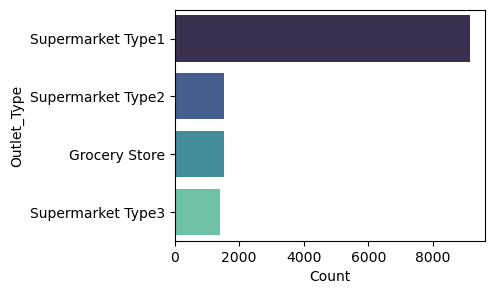

In [106]:
plt.figure(figsize=(4,3))
sns.countplot(y='Outlet_Type' , data=df ,palette='mako')
plt.xlabel('Count', fontsize=10)
plt.show()

**Categoric columns - Findings**<br>

**Item_Fat_Content - Most items sold are low fat.<br>
Outlet_Size - Bigmart outlets are mostly medium sized in our data.<br>
Item_Type - Item types that are distictly popular are fruits and vegetables and snack foods.<br>
Outlet_Identifier - Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are significanly lower.<br>
Outlet_Location_Type - The most common type is Tier3.<br>
Outlet_Type - Bigmart oulets are mostly Supermarket Type1.**

## (B) NUMERICAL VARIABLE 

In [40]:
numerical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
           numerical_columns.append(i)
numerical_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

### Item_Weight

In [41]:
df['Item_Weight'].describe()

count   14204.00
mean       12.79
std         4.23
min         4.55
25%         9.30
50%        12.79
75%        16.00
max        21.35
Name: Item_Weight, dtype: float64

<Axes: ylabel='Item_Weight'>

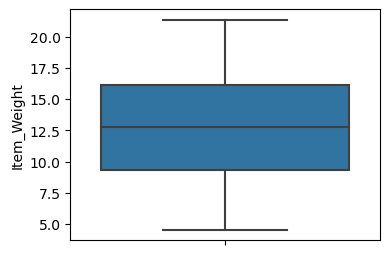

In [100]:
plt.figure(figsize=(4,3))
sns.boxplot(y='Item_Weight',data=df)
# No outliers

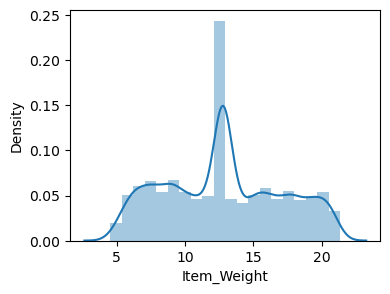

In [99]:
plt.figure(figsize = (4,3))
sns.distplot(df.Item_Weight, bins=20)
plt.show()

**The weight of the items maintly concentrate between 11kgs - 13 kgs**

## Item_Visibility

In [44]:
df['Item_Visibility'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14204 entries, 0 to 14203
Series name: Item_Visibility
Non-Null Count  Dtype  
--------------  -----  
14204 non-null  float64
dtypes: float64(1)
memory usage: 111.1 KB


In [45]:
df['Item_Visibility'].describe()

count   14204.00
mean        0.07
std         0.05
min         0.00
25%         0.03
50%         0.05
75%         0.09
max         0.33
Name: Item_Visibility, dtype: float64

In [46]:
df['Item_Visibility'].replace([0],df['Item_Visibility'].median(),inplace=True)

In [47]:
df['Item_Visibility'].value_counts()

Item_Visibility
0.05    879
0.08      3
0.08      3
0.08      3
0.08      3
       ... 
0.16      1
0.01      1
0.06      1
0.04      1
0.10      1
Name: count, Length: 13006, dtype: int64

<Axes: ylabel='Item_Visibility'>

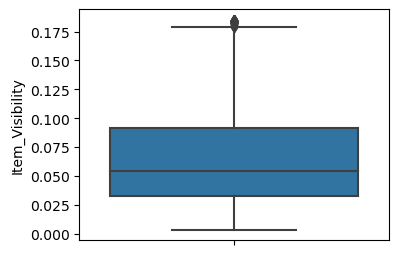

In [98]:
plt.figure(figsize=(4,3))
sns.boxplot(y='Item_Visibility',data=df)

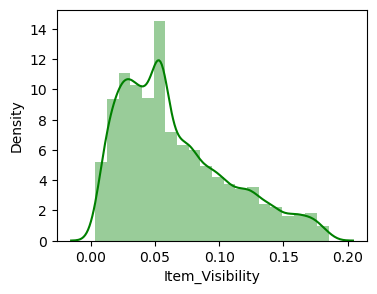

In [97]:
plt.figure(figsize = (4,3))
sns.distplot(df.Item_Visibility, bins=20, color="g")
plt.show()

## Item_MRP

In [50]:
df['Item_MRP'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14204 entries, 0 to 14203
Series name: Item_MRP
Non-Null Count  Dtype  
--------------  -----  
14204 non-null  float64
dtypes: float64(1)
memory usage: 111.1 KB


In [51]:
df['Item_MRP'].describe()

count   14204.00
mean      141.00
std        62.09
min        31.29
25%        94.01
50%       142.25
75%       185.86
max       266.89
Name: Item_MRP, dtype: float64

<Axes: ylabel='Item_MRP'>

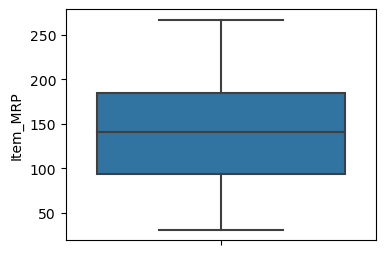

In [95]:
plt.figure(figsize=(4,3))
sns.boxplot(y='Item_MRP',data=df)
# no outliers

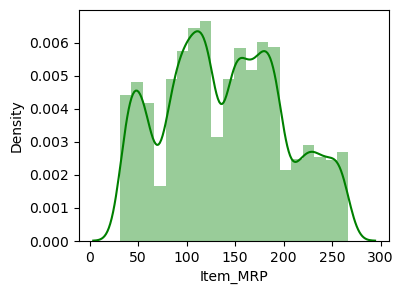

In [96]:
plt.figure(figsize = (4,3))
sns.distplot(df.Item_MRP, bins=20, color="g")
plt.show()

## Outlet_Establishment_Year

In [54]:
df['Outlet_Establishment_Year'].isna().sum()

0

In [55]:
df['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: count, dtype: int64

In [56]:
# create small values for establishment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years']

0        14
1         4
2        14
3        15
4        26
         ..
14199    16
14200     4
14201    11
14202     6
14203    11
Name: Outlet_Years, Length: 14204, dtype: int64

#### Outlet Years

In [57]:
df['Outlet_Years'].describe()

count   14204.00
mean       15.17
std         8.37
min         4.00
25%         9.00
50%        14.00
75%        26.00
max        28.00
Name: Outlet_Years, dtype: float64

<Axes: ylabel='Outlet_Years'>

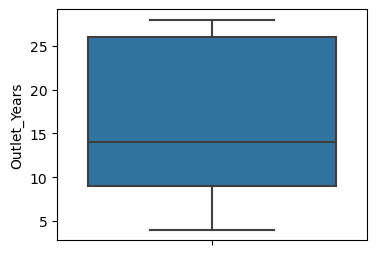

In [107]:
plt.figure(figsize=(4,3))
sns.boxplot(y='Outlet_Years',data=df)
# No outliers

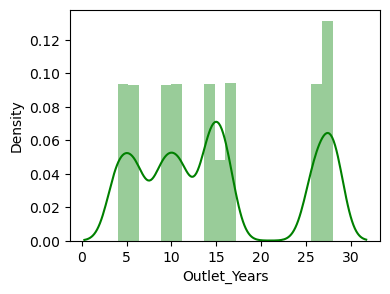

In [108]:
plt.figure(figsize = (4,3))
sns.distplot(df.Outlet_Years, bins=20, color="g")
plt.show()

**The oldest Bigmart outlet has completed 28 years**

In [60]:
df1=df.drop('Outlet_Establishment_Year',axis=1)

In [61]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,Medium,Tier 1,Supermarket Type1,3735.14,Food,14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,Medium,Tier 3,Supermarket Type2,443.42,Drinks,4
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,Medium,Tier 1,Supermarket Type1,2097.27,Food,14
3,FDX07,19.20,Regular,0.05,Fruits and Vegetables,182.09,OUT010,Medium,Tier 3,Grocery Store,732.38,Food,15
4,NCD19,8.93,Non-Edible,0.05,Household,53.86,OUT013,High,Tier 3,Supermarket Type1,994.71,Non-Consumable,26


## Item_Outlet_Sales

In [118]:
df['Item_Outlet_Sales'].describe()

count   14204.00
mean     2099.33
std      1542.43
min        33.29
25%       878.86
50%      1828.27
75%      2949.30
max     13086.96
Name: Item_Outlet_Sales, dtype: float64

<Axes: ylabel='Item_Outlet_Sales'>

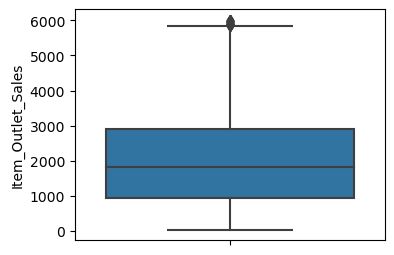

In [115]:
plt.figure(figsize=(4,3))
sns.boxplot(y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

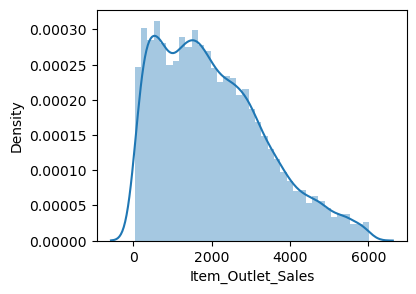

In [116]:
plt.figure(figsize=(4,3))
sns.distplot(df['Item_Outlet_Sales'])

In [65]:
import scipy.stats as stats

In [119]:
stats.shapiro(df['Item_Outlet_Sales'])

ShapiroResult(statistic=0.9523423910140991, pvalue=0.0)

**Since the sample size is large enough (≥30). I can rely on the Central Limit Theorem.**

In [120]:
df['Item_Outlet_Sales'].agg(['skew', 'kurtosis']).transpose()

skew        0.66
kurtosis   -0.19
Name: Item_Outlet_Sales, dtype: float64

<Axes: ylabel='Item_Outlet_Sales'>

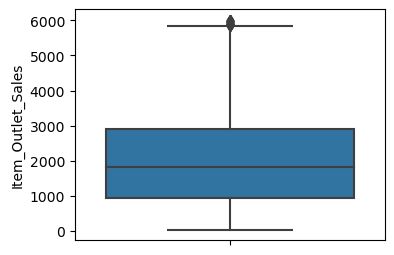

In [121]:
plt.figure(figsize=(4,3))
sns.boxplot(y=df['Item_Outlet_Sales'])

In [69]:
df_before_removing_outliers=df[:]

In [122]:
df_before_removing_outliers.to_csv('df_before_removing_outliers.csv', index=False)

In [123]:
# Python Square root transformation
#df['Item_Outlet_Sales'].insert(len(df['Item_Outlet_Sales']), 'A_Sqrt', np.sqrt(df.iloc[:,0]))
df1['A_Sqrt'] = np.sqrt(df1['Item_Outlet_Sales'])

In [72]:
#df.head()

In [73]:
#sns.boxplot(df1['A_Sqrt'])

## Removing Outliers from "Item_Visibility"

In [125]:
df=df_before_removing_outliers[:]

In [126]:
# function to detect outliers using the IQR method

def detect_outliers(df, feature):
    Q1  = df[feature].quantile(0.25)
    Q3  = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 3 * IQR
    lower_limit = Q1 - 3 * IQR
    return upper_limit, lower_limit

upper, lower = detect_outliers(df, "Item_Visibility")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

Upper limit:  0.27671872025
Lower limit:  -0.1495380355


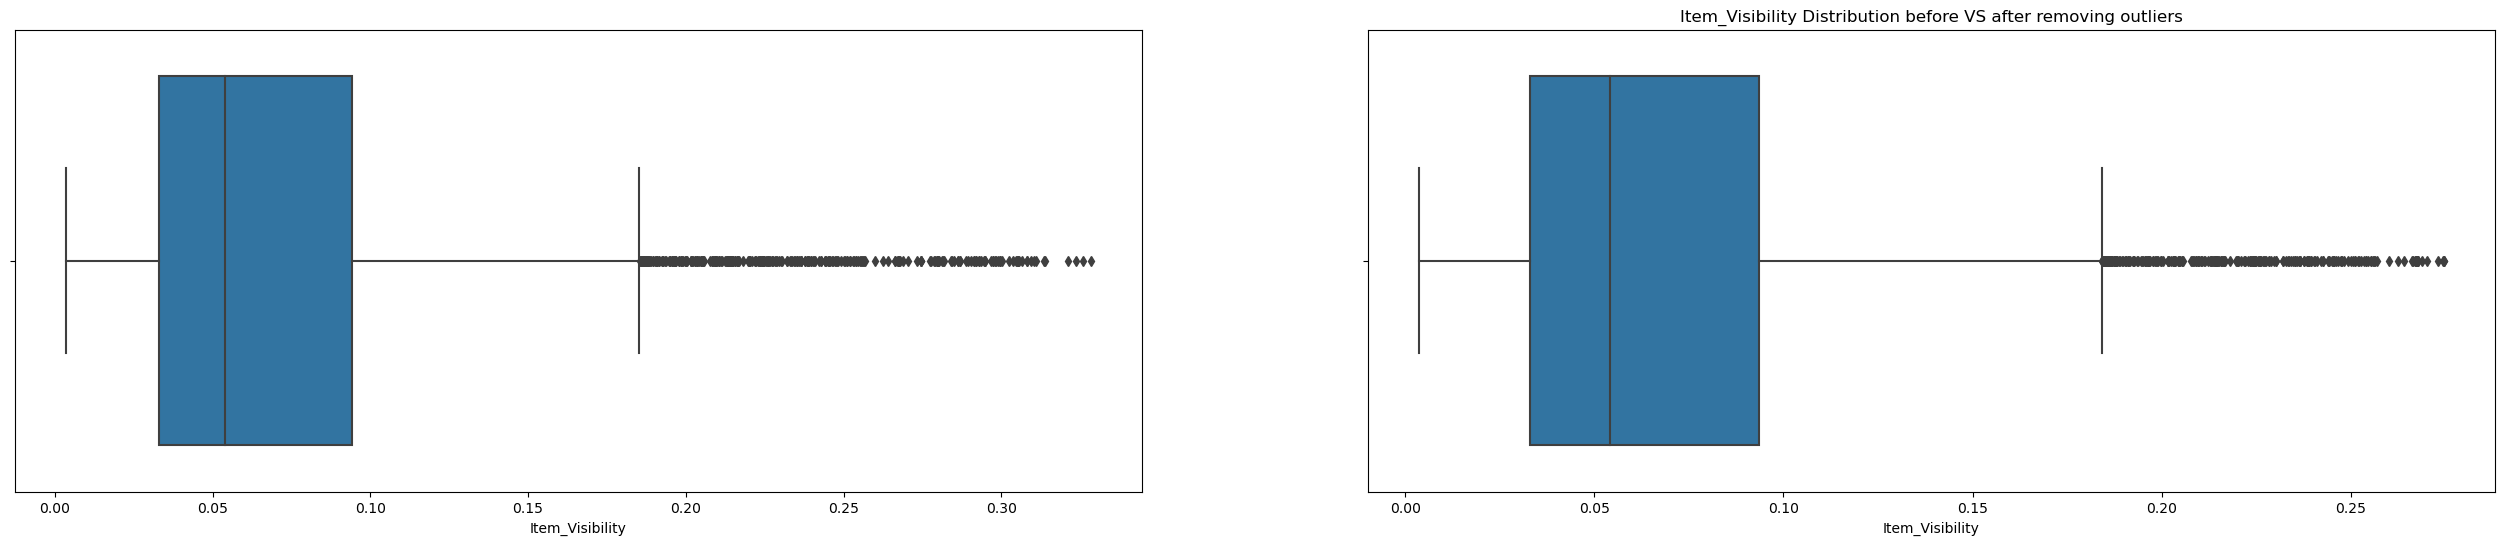

In [127]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=df['Item_Visibility'], ax=ax[0])

# removing outliers using the above function
df = df[(df['Item_Visibility'] > lower) & (df['Item_Visibility'] < upper)]

sns.boxplot(x=df['Item_Visibility'], ax=ax[1])
plt.title('Item_Visibility Distribution before VS after removing outliers')
plt.show()

## Removing Outliers from "Item_Outlet_Sales"

In [128]:
# function to detect outliers using the IQR method

def detect_outliers(df, feature):
    Q1  = df[feature].quantile(0.25)
    Q3  = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 3 * IQR
    lower_limit = Q1 - 3 * IQR
    return upper_limit, lower_limit

upper, lower = detect_outliers(df, "Item_Outlet_Sales")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

Upper limit:  9142.7656
Lower limit:  -5295.7732


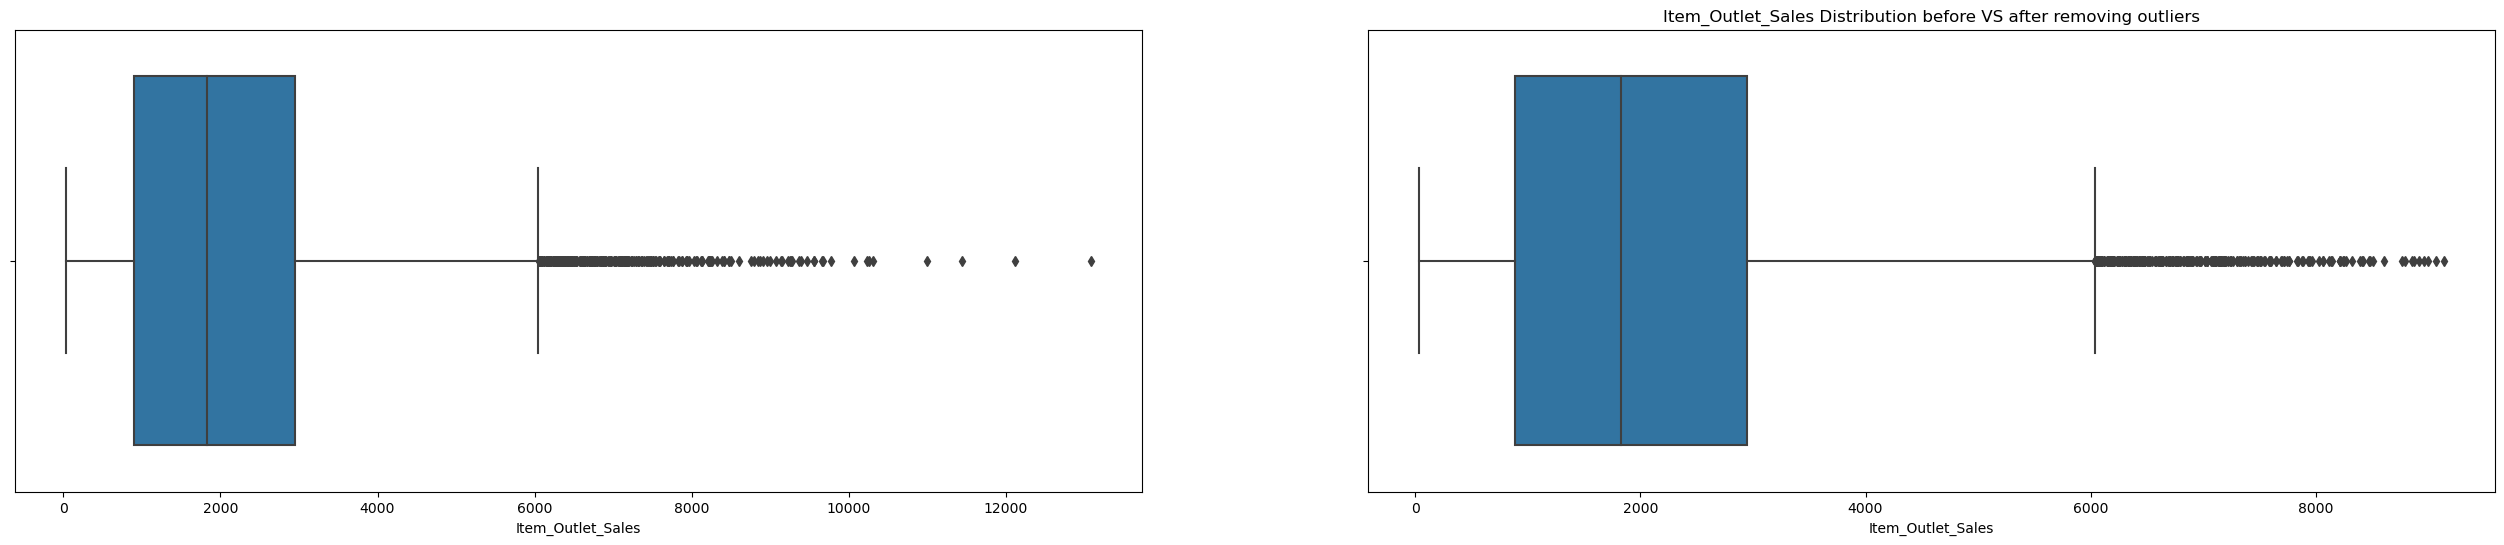

In [129]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=df['Item_Outlet_Sales'], ax=ax[0])

# removing outliers using the above function
df = df[(df['Item_Outlet_Sales'] > lower) & (df['Item_Outlet_Sales'] < upper)]

sns.boxplot(x=df['Item_Outlet_Sales'], ax=ax[1])
plt.title('Item_Outlet_Sales Distribution before VS after removing outliers')
plt.show()

In [130]:
df_after_outliers=df[:]

In [131]:
df_after_outliers.to_csv('df_after_outliers.csv',index=False)

In [132]:
df.shape

(14120, 14)

In [133]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14,Food,14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42,Drinks,4
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,Food,14
3,FDX07,19.20,Regular,0.05,Fruits and Vegetables,182.09,OUT010,1998,Medium,Tier 3,Grocery Store,732.38,Food,15
4,NCD19,8.93,Non-Edible,0.05,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71,Non-Consumable,26


## Bivariate and Multivariate Analysis

### A) Sales by New item type

In [134]:
Sales_per_item=df.groupby('New_Item_Type')['Item_Outlet_Sales'].sum()/df['Item_Outlet_Sales'].sum() * 100
Sales_per_item

New_Item_Type
Drinks            8.64
Food             72.49
Non-Consumable   18.87
Name: Item_Outlet_Sales, dtype: float64

In [135]:
Sales_ItemType=df.groupby('Item_Type')['Item_Outlet_Sales'].sum()/df['Item_Outlet_Sales'].sum() * 100
Sales_ItemType

Item_Type
Baking Goods             6.96
Breads                   2.98
Breakfast                1.28
Canned                   7.71
Dairy                    8.07
Frozen Foods             9.58
Fruits and Vegetables   14.65
Hard Drinks              2.45
Health and Hygiene       5.72
Household               11.32
Meat                     5.18
Others                   1.83
Seafood                  0.71
Snack Foods             14.62
Soft Drinks              4.88
Starchy Foods            2.07
Name: Item_Outlet_Sales, dtype: float64

Text(0.5, 1.0, 'Percentage Distribution of Sales by Item ')

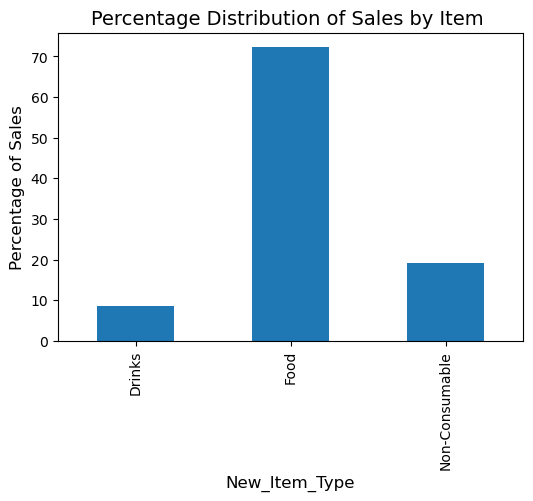

In [85]:
plt.figure(figsize=(4,3))
Sales_per_item.plot(kind='bar')
#sns.barplot(x='New_Item_Type' ,y='Item_Outlet_Sales', data=df ,palette='winter')
plt.xlabel('New_Item_Type', fontsize=12)
plt.ylabel('Percentage of Sales', fontsize=12)
plt.title('Percentage Distribution of Sales by Item ', fontsize=14)
#plt.legend()
#plt.show()

In [86]:
Sales_FatContent=df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()/df['Item_Outlet_Sales'].sum() * 100
Sales_FatContent.sort_values(ascending=False)

Item_Fat_Content
Low Fat      45.09
Regular      35.77
Non-Edible   19.14
Name: Item_Outlet_Sales, dtype: float64

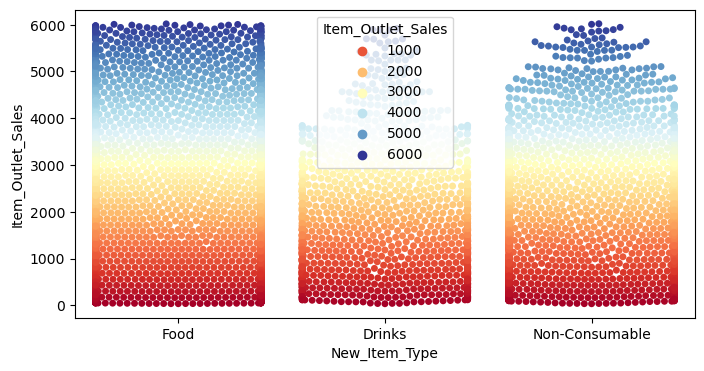

In [87]:
plt.figure(figsize=(8,4))
sns.swarmplot(df,x='New_Item_Type',y='Item_Outlet_Sales',hue='Item_Outlet_Sales', palette='RdYlBu')
plt.show()

**72% of the total Sales belongs to Food category**

### B) Sales by Outlet Size

In [136]:
Sales_per_OutletSize = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()/df['Item_Outlet_Sales'].sum() * 100
Sales_per_OutletSize

Outlet_Size
High     11.52
Medium   64.01
Small    24.47
Name: Item_Outlet_Sales, dtype: float64

Text(0.5, 0, 'Outlet_Size')

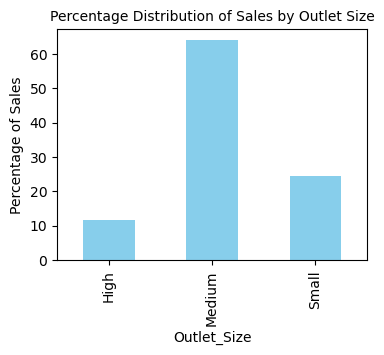

In [140]:
plt.figure(figsize=(4, 3))
Sales_per_OutletSize.plot(kind='bar', color='skyblue')
plt.xlabel('Outlet Size', fontsize=10)
plt.ylabel('Percentage of Sales', fontsize=10)
plt.title('Percentage Distribution of Sales by Outlet Size', fontsize=10)
plt.xlabel('Outlet_Size', fontsize=10)

**Medium-sized outlets account for 63% of the total sales.**

### C) Sales by Outlet_Location_Type

In [141]:
Sales_per_LocationType = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()/df['Item_Outlet_Sales'].sum() * 100
Sales_per_LocationType

Outlet_Location_Type
Tier 1   24.09
Tier 2   34.97
Tier 3   40.93
Name: Item_Outlet_Sales, dtype: float64

Text(0.5, 1.0, 'Percentage Distribution of Sales by Outlet Location')

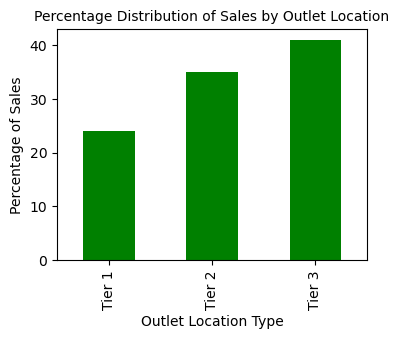

In [144]:
plt.figure(figsize=(4,3))
Sales_per_LocationType.plot(kind='bar',color='green')
plt.xlabel('Outlet Location Type', fontsize=10)
plt.ylabel('Percentage of Sales', fontsize=10)
plt.title('Percentage Distribution of Sales by Outlet Location', fontsize=10)

**Sales at Tier2 and Tier3 Outlet locations are quite close. Tier3 being the heighest at 39% of the total sales followed by Tier2 at 35%.**

### D)Sales by Outlet_Type

In [145]:
Sales_per_OutletType = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()/df['Item_Outlet_Sales'].sum() * 100
Sales_per_OutletType.sort_values(ascending=False)

Outlet_Type
Supermarket Type1   69.67
Supermarket Type3   18.36
Supermarket Type2   10.07
Grocery Store        1.90
Name: Item_Outlet_Sales, dtype: float64

Text(0.5, 1.0, 'Percentage Distribution of Sales by Outlet Type')

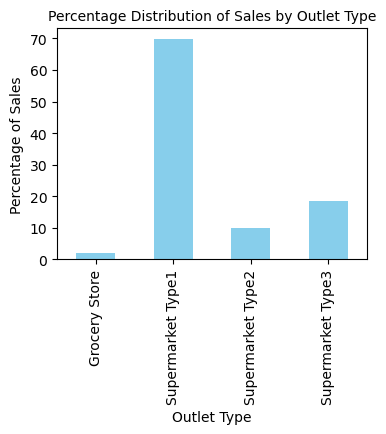

In [151]:
plt.figure(figsize=(4, 3))
#plt.bar(Sales_per_OutletType.index, Sales_per_OutletType, color='skyblue')
Sales_per_OutletType.plot(kind='bar', color='skyblue')
plt.xlabel('Outlet Type', fontsize=10)
plt.ylabel('Percentage of Sales', fontsize=10)
plt.title('Percentage Distribution of Sales by Outlet Type', fontsize=10)

In [ ]:
plt.figure(figsize=(11,4))
sns.swarmplot(df, x='Outlet_Type', y='Item_Outlet_Sales',hue="New_Item_Type", palette='RdYlBu', s = 60)
plt.title('Item_Outlet Sales by Item_MRP')
plt.show()

**71% of the Total Sales has taken place at Type 1 Supermarket**

### E) Sales by Outlet Years

In [104]:
Sales_per_OutletYears = df.groupby('Outlet_Years')['Item_Outlet_Sales'].sum()/df['Item_Outlet_Sales'].sum() * 100
Sales_per_OutletYears

Outlet_Years
4     10.563419
6     12.123490
9     12.445358
11    11.306553
14    12.098842
15     0.926351
16    11.873227
26    11.849996
28    16.812763
Name: Item_Outlet_Sales, dtype: float64

Text(0, 0.5, 'Percentage of Sales')

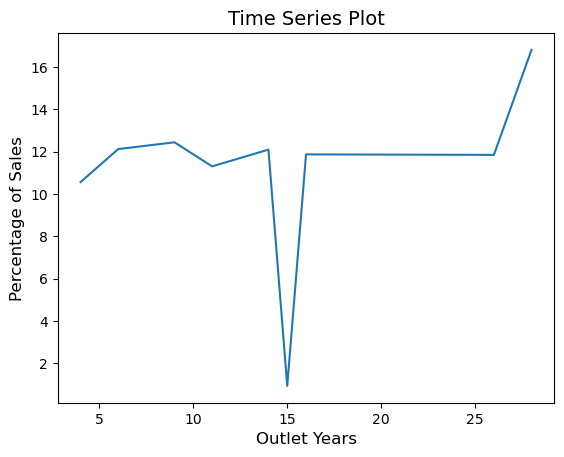

In [105]:
Sales_per_OutletYears.plot()
plt.figure(figsize=(4,3))
plt.title('Time Series Plot', fontsize=10)
plt.xlabel('Outlet Years', fontsize=10)
plt.ylabel('Percentage of Sales', fontsize=10)

**The percentage of total sales fluctuates between 10% and 12% for all outlets, except those completed 15 years. The highest sales occur at outlets completed 28 years.**

### F) Sales by Outlet_Identifier

In [112]:
Sales_per_OutletIdentifier = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()/df['Item_Outlet_Sales'].sum() * 100
Sales_per_OutletIdentifier=Sales_per_OutletIdentifier.sort_values(ascending=False)
Sales_per_OutletIdentifier

Outlet_Identifier
OUT027   16.32
OUT035   12.38
OUT017   12.09
OUT049   12.07
OUT013   11.78
OUT046   11.77
OUT045   11.31
OUT018   10.50
OUT010    0.92
OUT019    0.87
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
plt.figure(figsize=(4, 3))
Sales_per_OutletIdentifier.plot(kind='barh', color='skyblue')
plt.xlabel('Outlet dentifier', fontsize=12)
plt.ylabel('Percentage of Sales', fontsize=12)
plt.title('Percentage Distribution of Sales by OutletIdentifier', fontsize=14)

**The Outlet 27 is the most profitable outlet among all.**

### G) Sales as per Item_MRP , Item_Weight and Item_Visibility

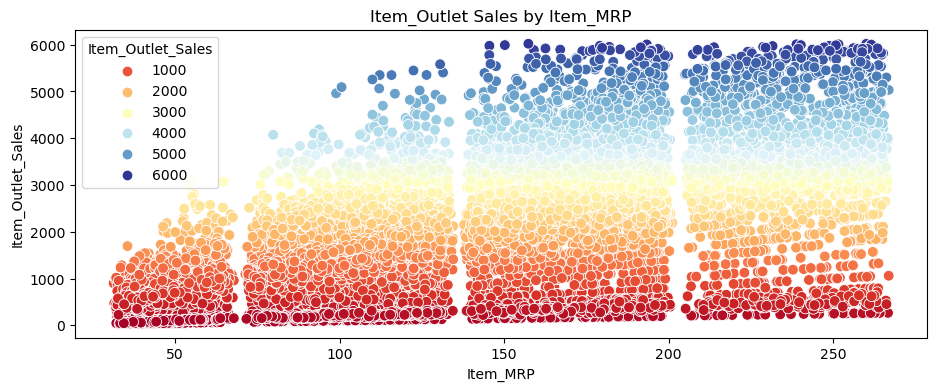

In [115]:
plt.figure(figsize=(11,4))
sns.scatterplot(df, x='Item_MRP', y='Item_Outlet_Sales',hue="Item_Outlet_Sales", palette='RdYlBu', s = 60)
plt.title('Item_Outlet Sales by Item_MRP')
plt.show()

<Figure size 400x150 with 0 Axes>

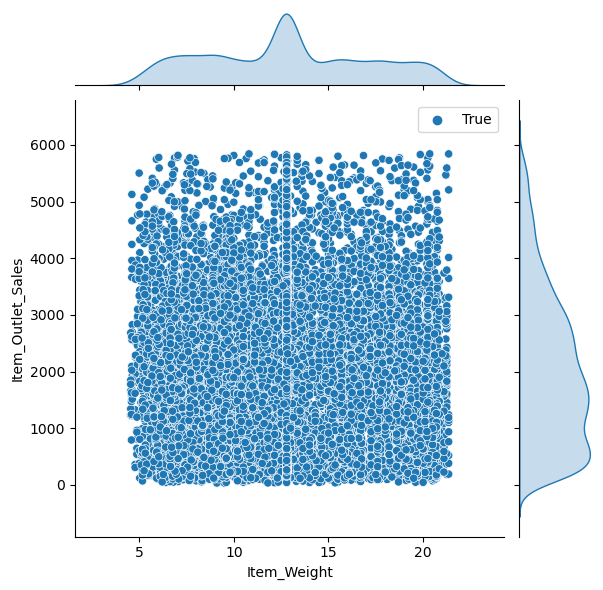

In [109]:
plt.figure(figsize=(4,1.5))
sns.jointplot(
    data=df,
    x='Item_Weight',
    y='Item_Outlet_Sales',
    hue=True,
    kind='scatter',
    height=6,
    ratio=5,
    space=0.2,
    cmap='YlGnBu')

In [ ]:
plt.figure(figsize=(4,1.5))
sns.jointplot(
    data=df,
    x='Item_Visibility',
    y='Item_Outlet_Sales',
    hue=True,
    kind='scatter',
    height=6,
    ratio=5,
    space=0.2,
    cmap='YlGnBu')

**Comments:**<br>

**Item_Weight - The data is very spreaded, no specific pattern.<br>
Item_Visibility - Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.<br>
Item_MRP - Items with higher MRP tend to sell better in most cases.**

In [111]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,A_Sqrt
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14,61.115775
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4,21.057607
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14,45.795961
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,15,27.062520
4,NCD19,8.93,Low Fat,0.054021,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26,31.538947


In [347]:
df=df1[:]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.swarmplot(df,x='New_Item_Type',y='Item_MRP',hue='Item_Outlet_Sales', palette='RdYlBu')
plt.show()

<Axes: xlabel='Outlet_Identifier'>

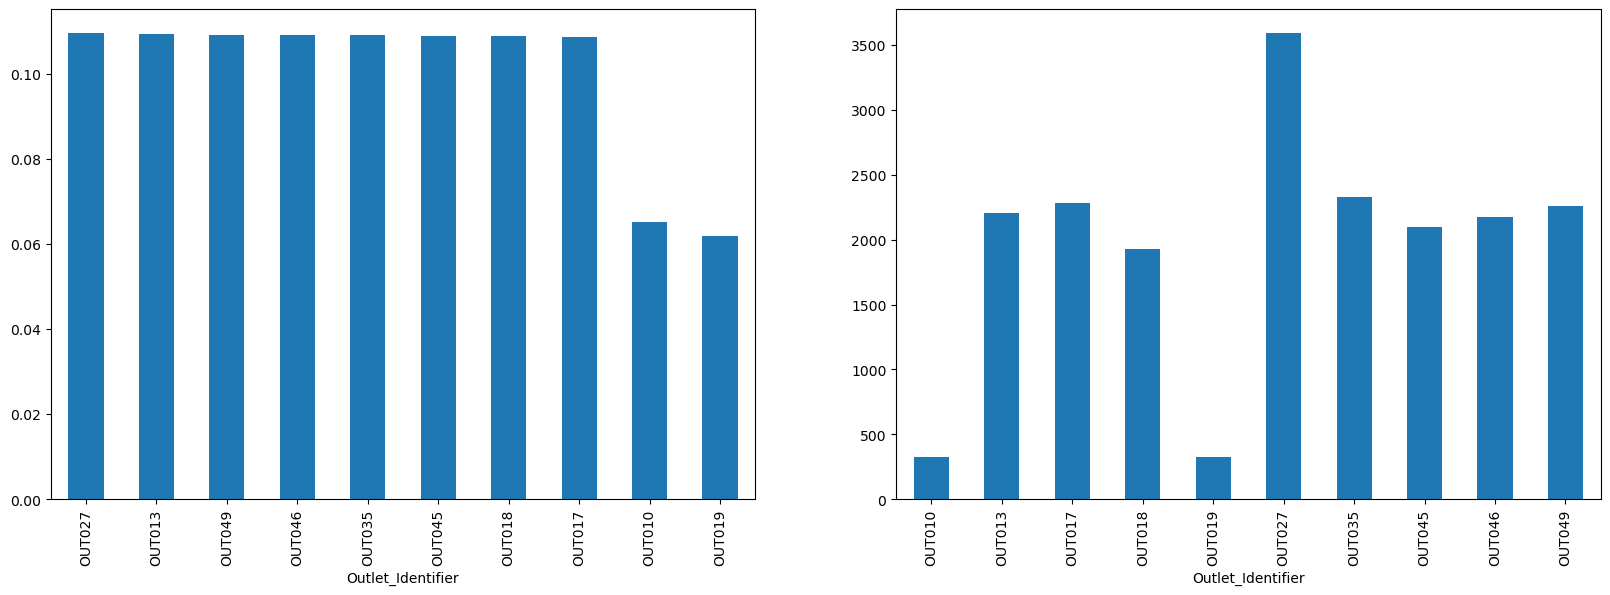

In [28]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[20,14])
plt.subplot(2,2,1)
df["Outlet_Identifier"].value_counts(normalize=True).plot.bar()
plt.subplot(2,2,2)
df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean().plot.bar()
#plt.subplot(2,2,3)
#df["age_group"].value_counts(normalize=True).plot.pie()
#plt.subplot(2,2,4)
#df.groupby("age_group")["response_flag2"].mean().plot.pie()
#plt.show()

In [ ]:
## Analysing correlation between "Item_Outlet_Sales","Item_Weight","Item_MRP",'Outlet_Years'

In [ ]:
df[["Item_Outlet_Sales","Item_Weight","Item_MRP",'Outlet_Years','Item_Visibility']].corr()

In [ ]:
sns.heatmap(df[["Item_Outlet_Sales","Item_Weight","Item_MRP",'Outlet_Years','Item_Visibility']].corr(),annot=True, cmap="Reds")

In [ ]:
plt.figure(figsize=(12,4))
sns.swarmplot(df,x='Outlet_Type',y='Item_Visibility',hue='Item_Outlet_Sales', palette='RdYlBu')
plt.show()